In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv


In [2]:
data= pd.read_csv('/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv')

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

It also includes the following information, which is not useful for building the models:
* UID: unique identifier ranging from 1 to 10000.
* ProductID: the id of the product.
-so we will drop it

In [8]:
data.drop(columns=['UDI', 'Product ID'], inplace=True)

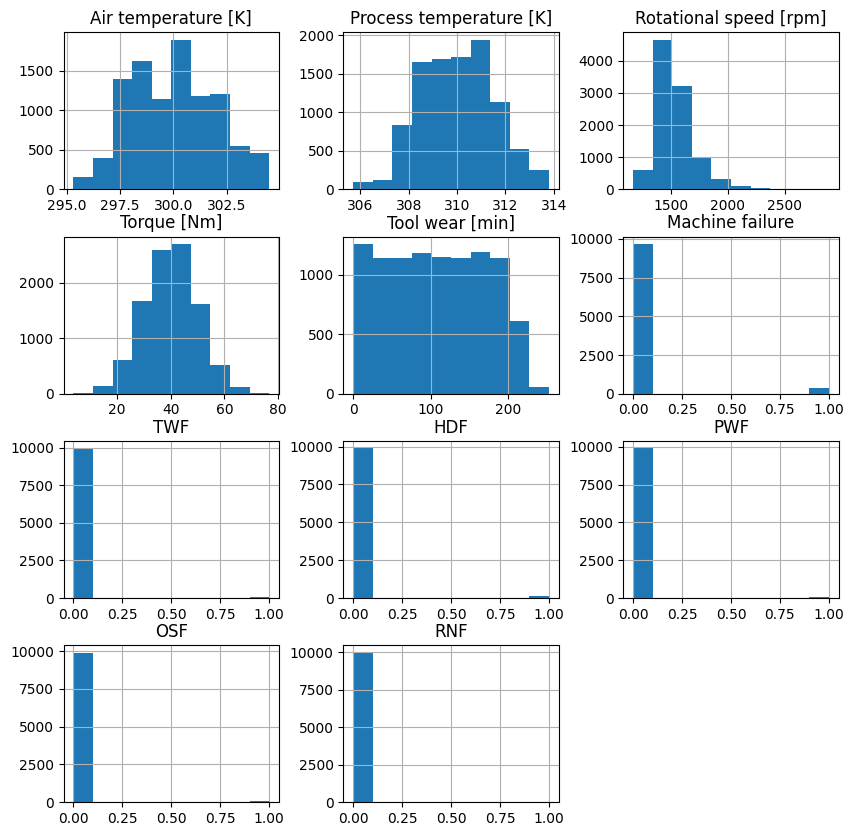

In [9]:
data.hist(figsize=(10,10));

**columns Info**
* UID: unique identifier ranging from 1 to 10000
* product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
* type: just the product type L, M or H from column 2
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

**The machine failure consists of five independent failure modes**

* tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
* heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
* power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
* overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
* random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

In [10]:
columns =data.columns
columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [11]:
for column in columns:
    print(f'{column}: {data[column].nunique()}')

Type: 3
Air temperature [K]: 93
Process temperature [K]: 82
Rotational speed [rpm]: 941
Torque [Nm]: 577
Tool wear [min]: 246
Machine failure: 2
TWF: 2
HDF: 2
PWF: 2
OSF: 2
RNF: 2


# Failure Modes Exploration:


### The quality of the product, consisting of a letter L, M, or H. Meaning low, medium, and high, respectively.

### What is the overall distribution of product quality variants (low, medium, high)?

In [12]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [13]:
Type=data['Type'].value_counts()
Type

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

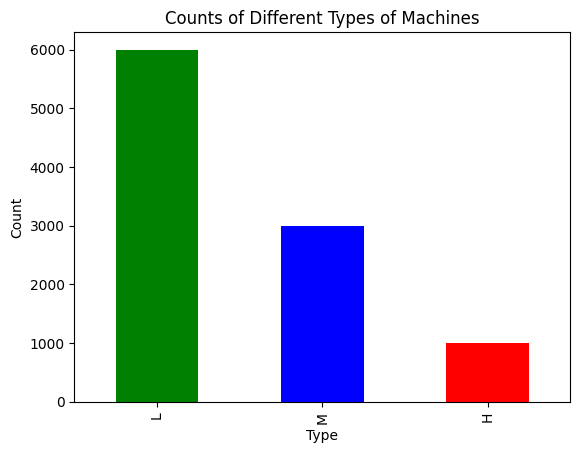

In [15]:
# Plotting the bar chart
Type.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Counts of Different Types of Machines')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## How is the 'machine failure' label distributed in the dataset?

In [16]:
Machine_failure =data['Machine failure'].value_counts()
Machine_failure

Machine failure
0    9661
1     339
Name: count, dtype: int64

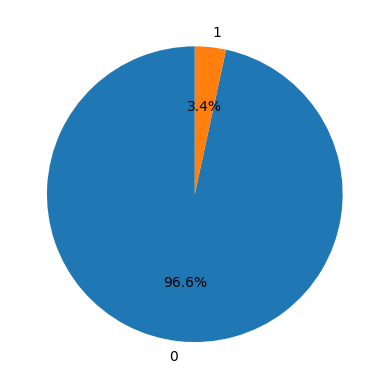

In [17]:
plt.pie(Machine_failure, labels=Machine_failure.index, autopct='%1.1f%%', startangle=90);

## What is the distribution of each failure mode (TWF, HDF, PWF, OSF, RNF) in the dataset?

In [18]:
failure_type = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

for i in failure_type:
    print(data[i].value_counts())
    print("----------------------")

TWF
0    9954
1      46
Name: count, dtype: int64
----------------------
HDF
0    9885
1     115
Name: count, dtype: int64
----------------------
PWF
0    9905
1      95
Name: count, dtype: int64
----------------------
OSF
0    9902
1      98
Name: count, dtype: int64
----------------------
RNF
0    9981
1      19
Name: count, dtype: int64
----------------------


# visualizing the relation between the target and features

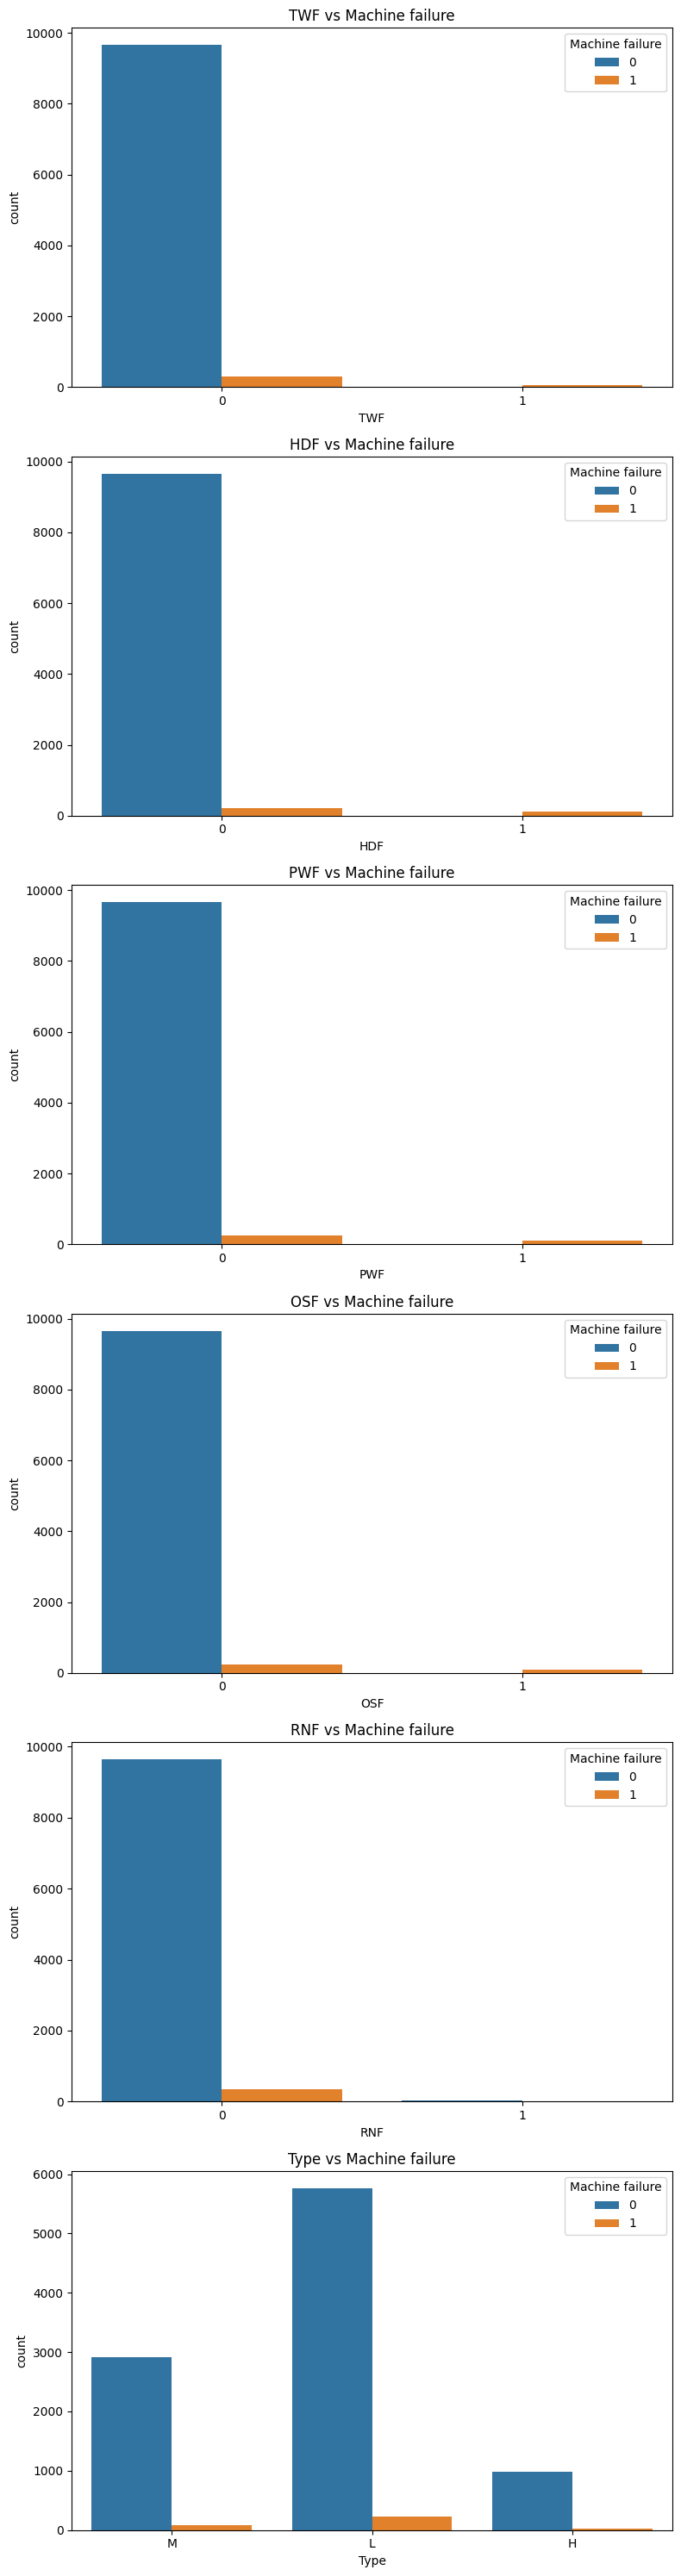

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with the specified features and target
features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']
target = 'Machine failure'

# Set up subplots for visualizing multiple features
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 5 * len(features)))

# Iterate through features and create bar plots
for i, feature in enumerate(features):
    sns.countplot(data=data, x=feature, hue=target, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

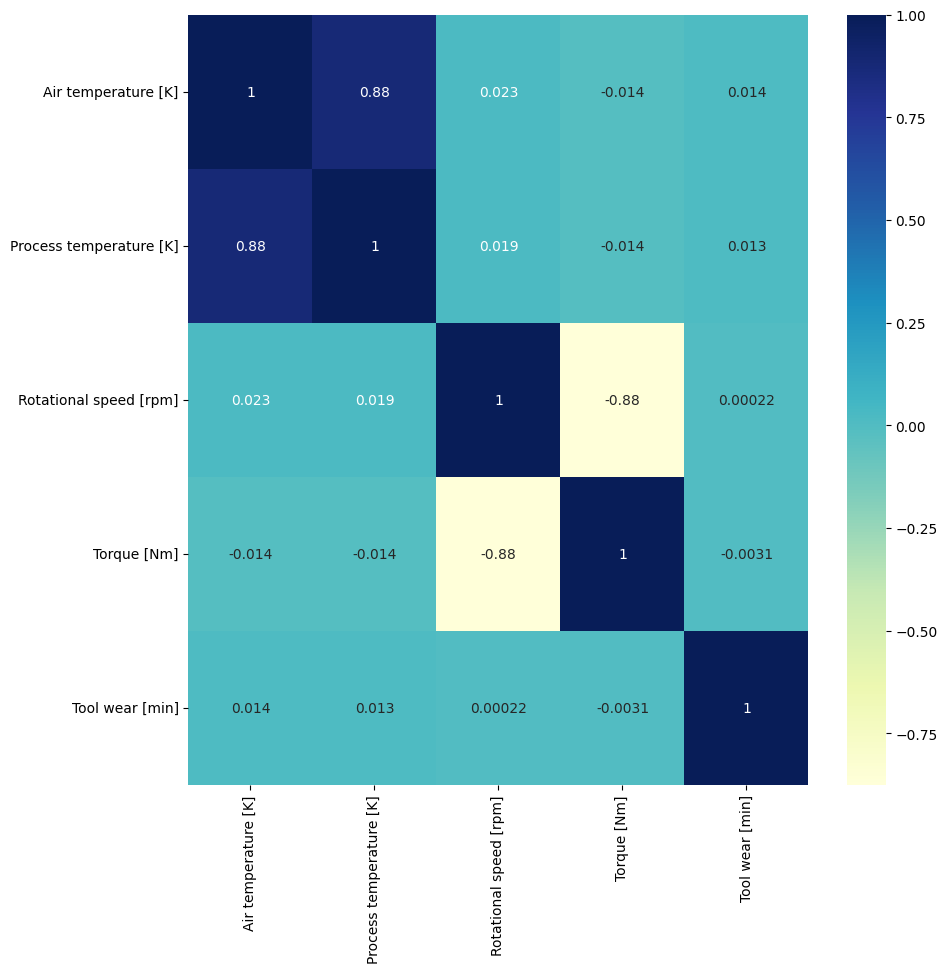

In [20]:
numerical=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(10,10))
sns.heatmap(data[numerical].corr(),annot=True,cmap='YlGnBu')

* The correlation between "Rotational speed" and "Torque" is -0.875027, indicating a strong negative correlation.
* Values close to 0 (e.g., "Rotational speed" and "Tool wear") suggest a weak or no correlation.
* the correlation between "Air temperature" and "Process temperature" is 0.876107, indicating a strong positive correlation


In [21]:
data[numerical].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


**Check for missing values, outliers, and inconsistencies.**

In [22]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64



* Skewness is a statistical measure that describes the asymmetry of a probability distribution. It provides information about the extent and direction of skew (departure from horizontal symmetry) in a dataset
* skewness helps you understand the shape of the distribution of each variable. Positive skewness means the tail on the right side is longer or fatter than the left side, and negative skewness means the tail on the left side is longer or fatter than the right side. A skewness close to zero indicates a more symmetrical distribution.

----- SKEWNESS ------------
Air temperature [K] skewness = 0.11
Process temperature [K] skewness = 0.02
Rotational speed [rpm] skewness = 1.99
Torque [Nm] skewness = -0.01
Tool wear [min] skewness = 0.03
---------------------------


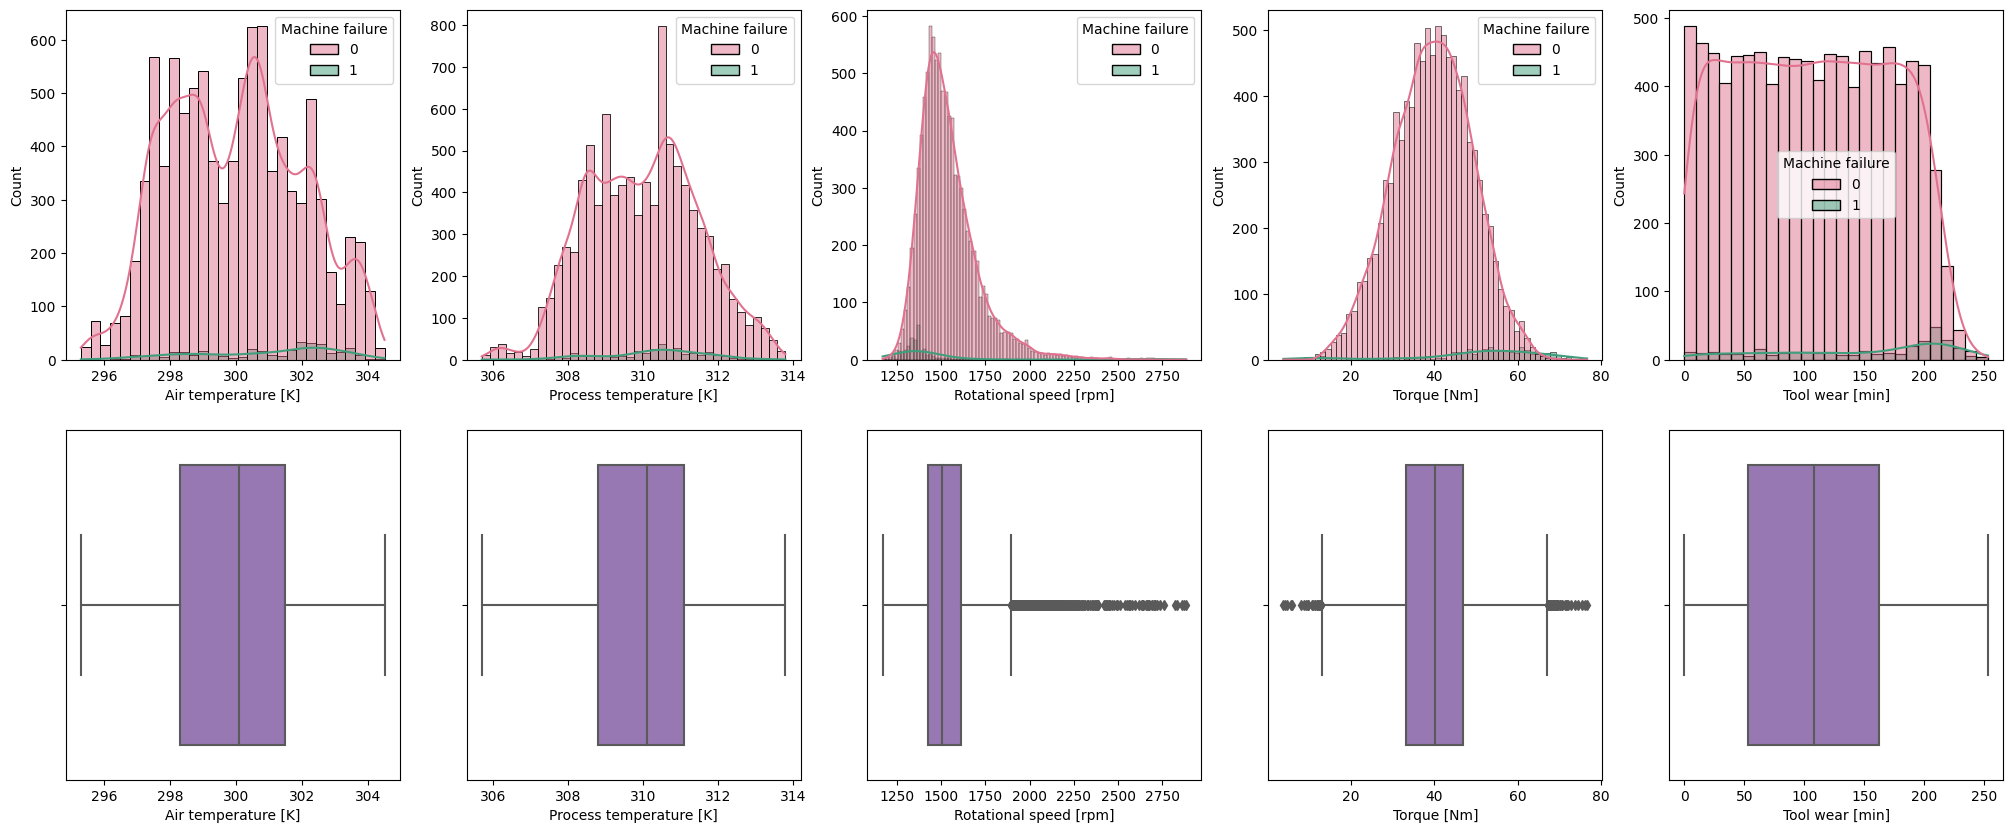

In [23]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 5, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=data, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette=colors)
    sns.boxplot(data=data, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(data[i].skew(), 2)))
print('---------------------------')

# Removing outliners
* threshold is 1.5, which is based on the standard definition of outliers in a normal distribution.

In [24]:
# Function to calculate the maximum and minumum value from the boxplot Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'
def maximum_box(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    return maximum, minimum

for i in ['L', 'M', 'H']:
    df_product_type = data[data['Type'] == i]
    max_rotational_speed, min_rotational_speed = maximum_box(df_product_type['Rotational speed [rpm]'])
    max_torque, min_torque = maximum_box(df_product_type['Torque [Nm]'])
    print('Values from boxplot for type product ' + i + ':')
    print(f'Maximum torque value: {round(max_torque,2)}')
    print(f'Minimum torque value: {round(min_torque,2)}')
    print(f'Maximum rotational speed value: {round(max_rotational_speed,2)}')
    print(f'Minimum rotational speed value: {round(min_rotational_speed,2)}')
    print('='*20)

Values from boxplot for type product L:
Maximum torque value: 67.2
Minimum torque value: 12.8
Maximum rotational speed value: 1894.0
Minimum rotational speed value: 1142.0
Values from boxplot for type product M:
Maximum torque value: 67.05
Minimum torque value: 13.05
Maximum rotational speed value: 1897.0
Minimum rotational speed value: 1137.0
Values from boxplot for type product H:
Maximum torque value: 67.0
Minimum torque value: 12.6
Maximum rotational speed value: 1893.75
Minimum rotational speed value: 1143.75


In [25]:
import pandas as pd
import numpy as np

def remove_outliers(data, column_name):
    # Calculate the first and third quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep values within the bounds
    filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    return filtered_data

# Apply the remove_outliers function
filtered_data = remove_outliers(data, 'Rotational speed [rpm]')

# Display the result
print("Original data:")
print(data)
print("\nData after removing outliers:")
print(filtered_data)

Original data:
     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49

In [26]:
# Getting the length of the filtered data
length_of_filtered_data = len(filtered_data)
length_of_filtered_data

9582

In [27]:
# Apply the remove_outliers function
filtered_data_final = remove_outliers(filtered_data, 'Torque [Nm]')
filtered_data_final.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## visualizing the data after removing the outliners

----- SKEWNESS ------------
Air temperature [K] skewness = 0.11
Process temperature [K] skewness = 0.02
Rotational speed [rpm] skewness = 1.99
Torque [Nm] skewness = -0.01
Tool wear [min] skewness = 0.03
---------------------------


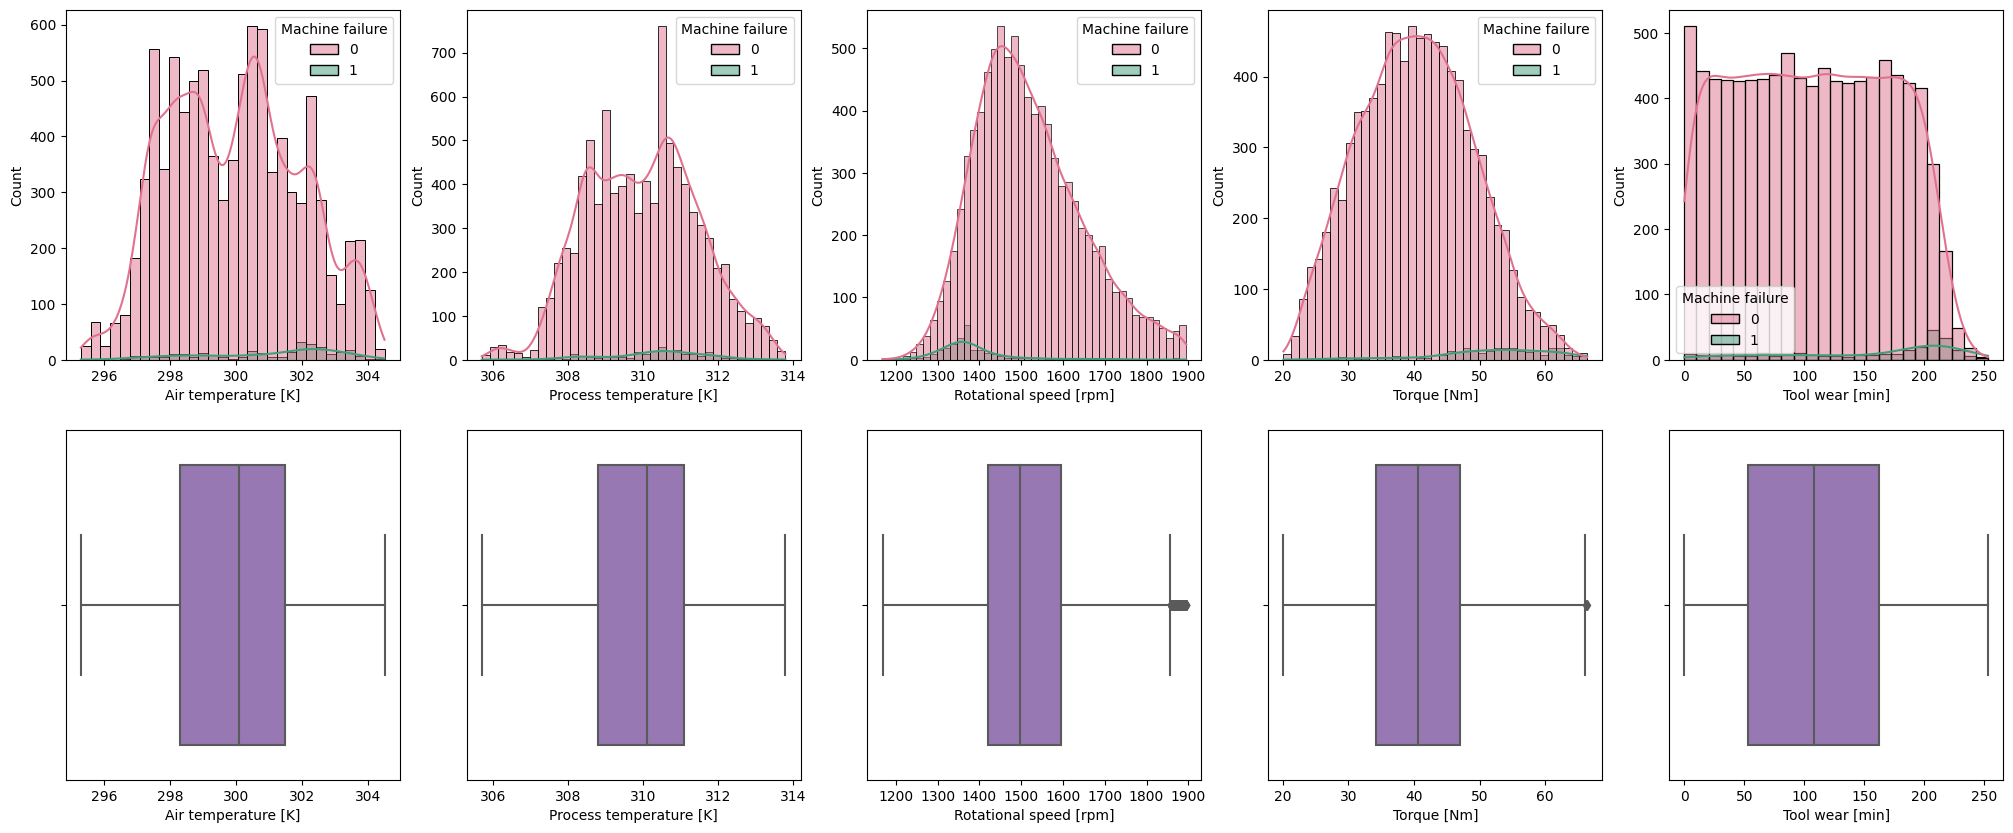

In [28]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 5, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=filtered_data_final, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette=colors)
    sns.boxplot(data=filtered_data_final, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(data[i].skew(), 2)))
print('---------------------------')